<a href="https://colab.research.google.com/github/IngAS20/Maestria/blob/main/clasificador_de_vinilos_trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Final Clasificador de Vinilos realizado por:**
* Alberto Sanchez
* Christian Moyonero
* Greivin Trejos
* Luis Carlos Salas

# Lectura de los datos de entrenamiento

In [ ]:
#Primer forma de leer nuestros datos, subiendo el archivo manualmente
!ls
!unzip leather_dataset.zip

leather_dataset  leather_dataset_2  leather_dataset.zip  sample_data
Archive:  leather_dataset.zip
replace leather_dataset/Grain off/Grain off 01 (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: leather_dataset/Grain off/Grain off 01 (1).jpg  
  inflating: leather_dataset/Grain off/Grain off 01 (10).jpg  
  inflating: leather_dataset/Grain off/Grain off 01 (100).jpg  
  inflating: leather_dataset/Grain off/Grain off 01 (101).jpg  
  inflating: leather_dataset/Grain off/Grain off 01 (102).jpg  
  inflating: leather_dataset/Grain off/Grain off 01 (103).jpg  
  inflating: leather_dataset/Grain off/Grain off 01 (104).jpg  
  inflating: leather_dataset/Grain off/Grain off 01 (105).jpg  
  inflating: leather_dataset/Grain off/Grain off 01 (106).jpg  
  inflating: leather_dataset/Grain off/Grain off 01 (107).jpg  
  inflating: leather_dataset/Grain off/Grain off 01 (108).jpg  
  inflating: leather_dataset/Grain off/Grain off 01 (109).jpg  
  inflating: leather_dataset/Grain off/G

In [ ]:
#instalacion de la libreria one drive downloader
!pip install onedrivedownloader

In [ ]:
!pip install torch
!pip install torchvision

In [ ]:
from onedrivedownloader import download

path = "https://tecnube1-my.sharepoint.com/:u:/g/personal/sacalderon_itcr_ac_cr/Efak2SKuFNdJjxOiywHoV5gBQeK2SZEyTk0kQto7Kki3Eg?e=fs6AFI"
#Nombre del archivo
file_name = "leather_dataset.zip"
download(path, file_name, unzip = True, unzip_path = "./leather_dataset_2")


Unzipping file...


Extracting files: 100%|██████████| 1203/1203 [00:00<00:00, 19327.26it/s]


'./leather_dataset_2'

### Trabajo práctico: Varianza descriptor de textura en línea de producción de cuero.


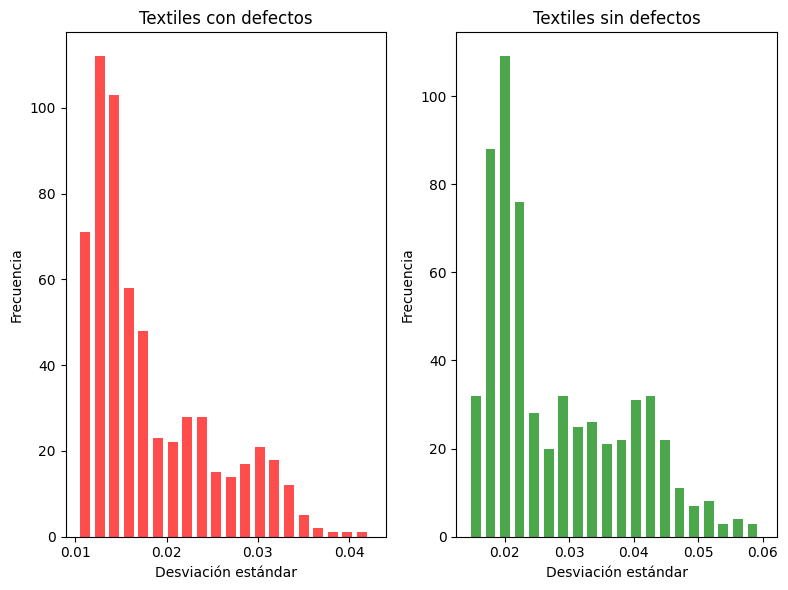

La varianza promedio de las imagenes defectuosas es:  tensor(0.0183)
La desviación estándar de la varianza de imagenes defectuosas es:  tensor(0.0067)
La varianza promedio de imagenes no defectuosas es:  tensor(0.0284)
La desviación estándar de la varianza de imagenes no defectuosas es:  tensor(0.0105)


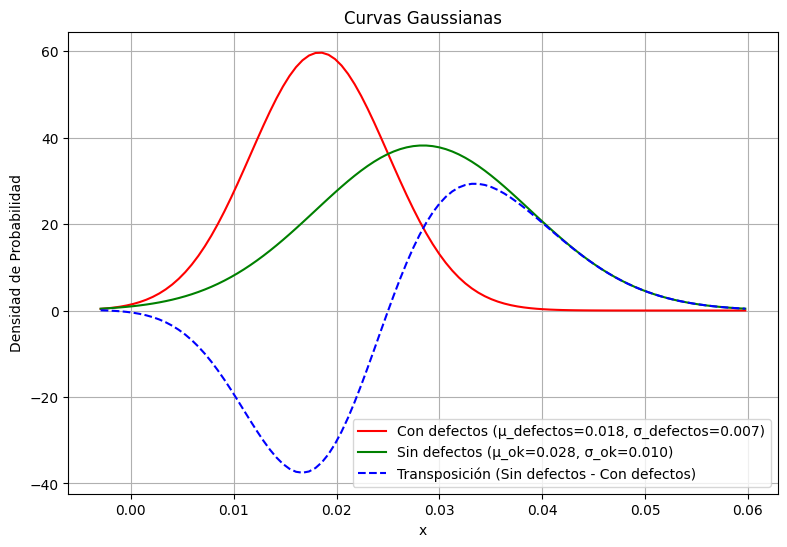

In [ ]:
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
import matplotlib.pyplot as plt

# 1. Carga del dataset de imágenes
def cargar_dataset_entrenamiento(ruta_dataset):
    """
    Función que construye el cargador de imágenes en memoria.
    Parámetros:
        ruta_dataset: Ruta del dataset a cargar.
    Retorna:
        cargador_imagenes: Dataset cargado con transformaciones aplicadas.
    """
    transformaciones = transforms.Compose([
        transforms.Resize((223, 223)),  # Redimensiona las imágenes
        transforms.Grayscale(),         # Convierte a escala de grises
        transforms.ToTensor()           # Convierte la imagen en un tensor
    ])
    cargador_imagenes = ImageFolder(ruta_dataset, transform=transformaciones)
    return cargador_imagenes

# Ruta del dataset (modifica esta ruta según tu entorno)
ruta_dataset = "./leather_dataset_2/leather_dataset/"
cargador_imagenes = cargar_dataset_entrenamiento(ruta_dataset)


# 2. Cálculo de desviaciones estándar por categoría
def calcular_desviaciones_por_categoria(cargador, etiqueta):
    """
    Calcula las desviaciones estándar para una categoría específica.
    Parámetros:
        cargador: Dataset cargado.
        etiqueta: Índice de la etiqueta (0 para defectuoso, 1 para no defectuoso).
    Retorna:
        desviaciones: Lista de desviaciones estándar para la categoría.
    """
    desviaciones = []
    for imagen, lbl in cargador:
        if lbl == etiqueta:
            desviaciones.append(torch.std(imagen).item())  # Calcula desviación estándar
    return desviaciones

# 3. Graficar histogramas de desviaciones estándar
def graficar_histogramas(desviaciones_def, desviaciones_no_def):
    """
    Grafica los histogramas de las desviaciones estándar por categoría.
    """
    plt.figure(figsize=(8,6))
    plt.subplot(1, 2, 1)
    plt.hist(desviaciones_def, bins=20, alpha=0.7, color='red', width=0.0011)
    plt.title("Textiles con defectos")
    plt.xlabel("Desviación estándar")
    plt.ylabel("Frecuencia")

    plt.subplot(1, 2, 2)
    plt.hist(desviaciones_no_def, bins=20, alpha=0.7, color='green', width=0.0015)
    plt.title("Textiles sin defectos")
    plt.xlabel("Desviación estándar")
    plt.ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

def calcular_histograma_desviaciones_estandar(cargador):
    # Calcular desviaciones estándar para cada categoría
    desviaciones_defectuosas = calcular_desviaciones_por_categoria(cargador_imagenes, 0)
    desviaciones_no_defectuosas = calcular_desviaciones_por_categoria(cargador_imagenes, 1)

    # Graficar histogramas
    graficar_histogramas(desviaciones_defectuosas, desviaciones_no_defectuosas)
    return desviaciones_defectuosas, desviaciones_no_defectuosas

desviaciones_defectuosas, desviaciones_no_defectuosas = calcular_histograma_desviaciones_estandar(cargador_imagenes)

# Convertir las desviaciones estándar en tensores
def train_model(desviaciones_defectuosas,desviaciones_no_defectuosas):

    tensor_defectuosas = torch.tensor(desviaciones_defectuosas)
    tensor_no_defectuosas = torch.tensor(desviaciones_no_defectuosas)

    # 4. Calcular parámetros Gaussianos
    mu_defectuosas = torch.mean(tensor_defectuosas)
    sigma_defectuosas = torch.std(tensor_defectuosas)

    mu_no_defectuosas = torch.mean(tensor_no_defectuosas)
    sigma_no_defectuosas = torch.std(tensor_no_defectuosas)
    print("La varianza promedio de las imagenes defectuosas es: ",mu_defectuosas)
    print("La desviación estándar de la varianza de imagenes defectuosas es: ",sigma_defectuosas)
    print("La varianza promedio de imagenes no defectuosas es: ",mu_no_defectuosas)
    print("La desviación estándar de la varianza de imagenes no defectuosas es: ",sigma_no_defectuosas)
    return mu_defectuosas, sigma_defectuosas, mu_no_defectuosas, sigma_no_defectuosas

mu_defectuosas, sigma_defectuosas, mu_no_defectuosas, sigma_no_defectuosas = train_model(desviaciones_defectuosas,desviaciones_no_defectuosas)

# 5. Generar curvas Gaussianas
def construir_modelo(mu1, sigma1, mu2, sigma2):
    """
    Calcula y grafica las curvas Gaussianas para dos distribuciones.
    Parámetros:
        mu1, sigma1: Media y desviación estándar de la primera distribución (con defectos).
        mu2, sigma2: Media y desviación estándar de la segunda distribución (sin defectos).
    """
    x = torch.linspace(min(mu1 - 3 * sigma1, mu2 - 3 * sigma2), max(mu1 + 3 * sigma1, mu2 + 3 * sigma2), 100)

    y1 = (1 / (sigma1 * torch.sqrt(torch.tensor(2 * torch.pi)))) * torch.exp(-0.5 * ((x - mu1) / sigma1) ** 2)
    y2 = (1 / (sigma2 * torch.sqrt(torch.tensor(2 * torch.pi)))) * torch.exp(-0.5 * ((x - mu2) / sigma2) ** 2)
    transposed_curve = y2 - y1

    # Graficar las curvas
    plt.figure(figsize=(9.15,6))
    plt.plot(x.numpy(), y1.numpy(), label=f"Con defectos (μ_defectos={mu1.item():.3f}, σ_defectos={sigma1.item():.3f})", color='red')
    plt.plot(x.numpy(), y2.numpy(), label=f"Sin defectos (μ_ok={mu2.item():.3f}, σ_ok={sigma2.item():.3f})", color='green')
    plt.plot(x.numpy(), transposed_curve.numpy(), label="Transposición (Sin defectos - Con defectos)", color='blue', linestyle='dashed')
    plt.xlabel("x")
    plt.ylabel("Densidad de Probabilidad")
    plt.title("Curvas Gaussianas")
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar
construir_modelo(mu_defectuosas, sigma_defectuosas, mu_no_defectuosas, sigma_no_defectuosas)
